<a href="https://colab.research.google.com/github/Ruchira507/Technocolabs-Softwares-Mini-Project/blob/patch-1/Ruchira_Shrawagi_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement / Description:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

#Hypothesis Testing:
Sales are higher during weekends.

Higher sales during morning and late evening.

Higher sales during end of the year.

Store size affects the sales.

Location of the store affects the sales.

Items with more shelf space sell more.

In [52]:
pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Data Collection:

In [ ]:
train_data=pd.read_csv('/content/Train.csv')
test_data=pd.read_csv('/content/Test.csv')

In [ ]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# Data Structure and Content:

In [ ]:
print (train_data.shape); 
print (test_data.shape)

(8523, 12)
(5681, 11)


Train dataset have 8523 rows and 12 columns whereas test data set has 5681 rows and 11 columns.

In [ ]:
# Now lets see column names of train and test data set
print(train_data.columns);
print(test_data.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


**we will combine both train and test to carry out data visualization, feature engineering, one-hot encoding, and label encoding. Later we would split this combined data back to train and test datasets.**


In [69]:
train_data ['source'] = 'train'
test_data ['source'] = 'test'
df=pd.concat([train_data,test_data], ignore_index=True)

In [ ]:
#Now we can see the column ans row size of that combined dataframe
df.shape

(14204, 13)

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

# Exploratory Data Analysis:

## Univariate Analysis:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69a8da6c10>,
      dtype=object)

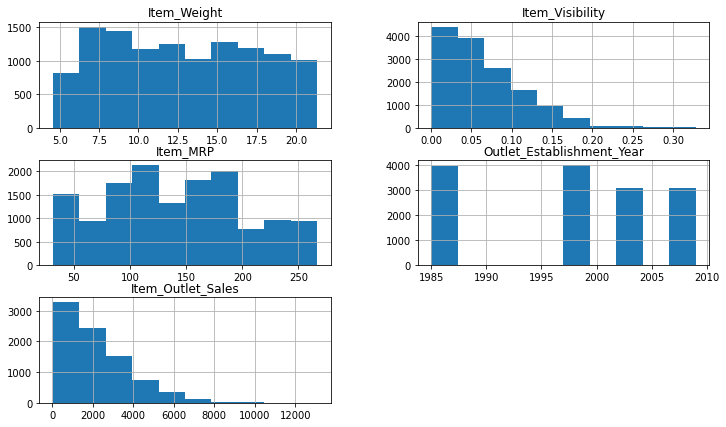

In [ ]:
# It shows the details graphical discription of the each dataset
df.hist(figsize= (12, 7)) 

**Now we will see top 5 Item type using bar plot**

In [ ]:
df.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'counts')

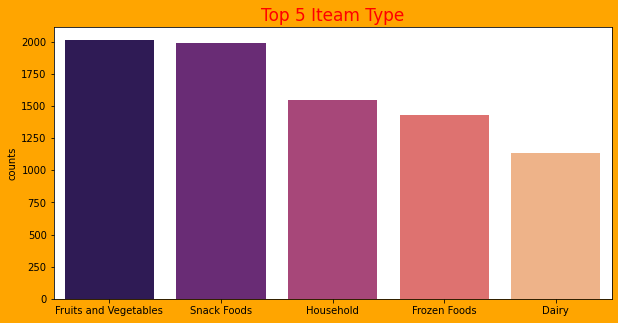

In [70]:
plt.figure (figsize= (10, 5), facecolor = "Orange")
sns.barplot(df["Item_Type"].value_counts()[:5].index, df["Item_Type"].value_counts()[:5].values, palette = 'magma')
plt.title ("Top 5 Iteam Type", fontsize = 17, color = 'Red')
plt.xlabel =("Iteam_type")
plt.ylabel("counts")

*In the above bar plot we can see top 5 most selling Itesm types such as Fruits and Vegetables, Snack foods, Household, Frozen Foods & Dairy.*

**Showing Team MRP using Histogram**



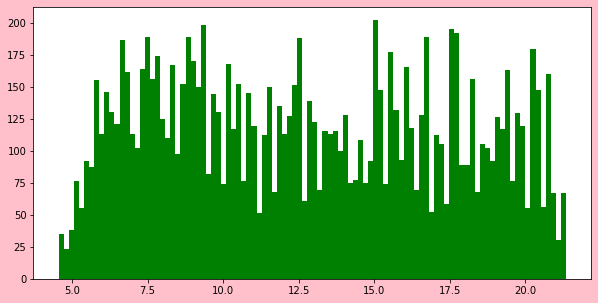

In [ ]:
plt.figure (figsize = (10,5), facecolor = 'Pink')
plt.hist(df["Item_Weight"].values, color = "green", bins= 100)  
plt.show()

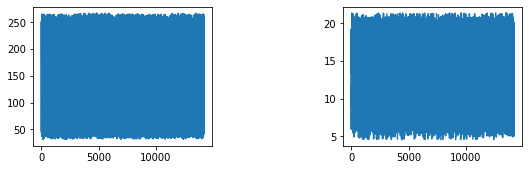

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad=10)
ax[0].plot(df['Item_MRP'].values)
ax[1].plot(df['Item_Weight'].values)

plt.show();

**Now we will see Subplot**

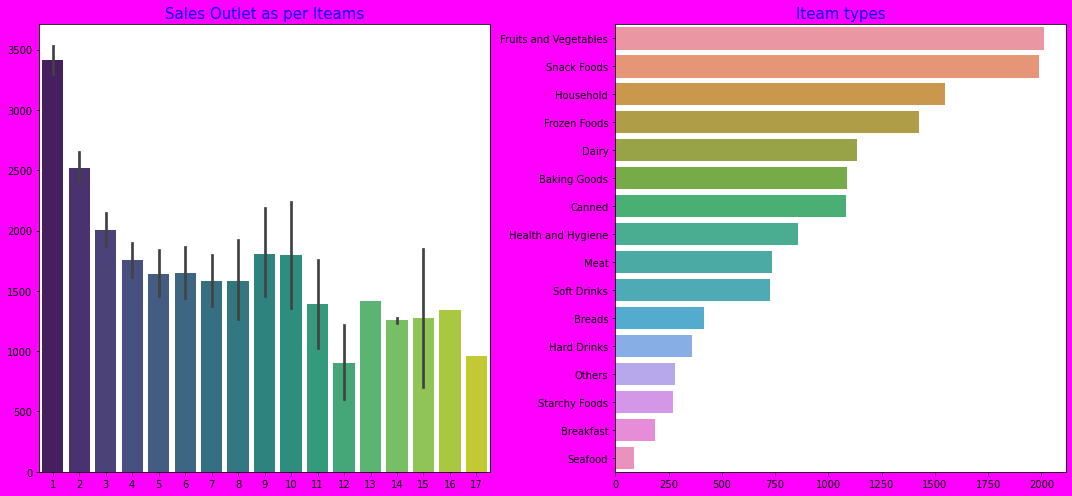

In [ ]:
fig,axes = plt.subplots (figsize = (15, 7), nrows = 1, ncols = 2, facecolor = 'Magenta')
sns.barplot (x = df['Item_Outlet_Sales'].value_counts()[:].values, y = df['Item_Outlet_Sales'].value_counts()[:].index, 
             ax=axes[0], palette = 'viridis')
axes[0].set_title('Sales Outlet as per Iteams', fontsize = 15, color = 'Blue')
sns.barplot (x = df['Item_Type'].value_counts()[:].values, y = df['Item_Type'].value_counts()[:].index,ax=axes[1])
axes[1].set_title('Iteam types', fontsize = 15, color = 'Blue')
fig.tight_layout()
plt.show()

*We can see the sales outlet and Iteam types in same visualization using subplot. Also, we can see minimum and maximum sales and Iteams in same visualization.*

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


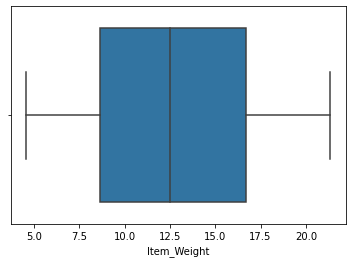

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


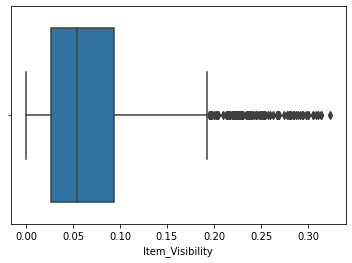

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


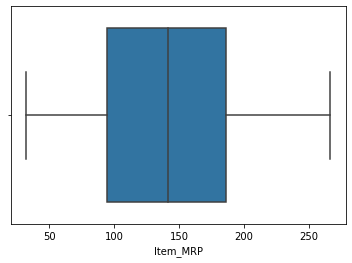

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


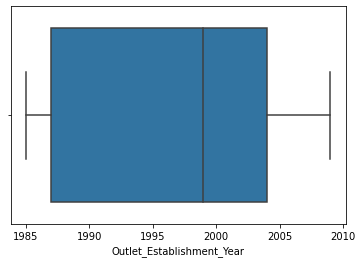

In [ ]:
for i in df.describe().columns:
  sns.boxplot(df[i].dropna())
  plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


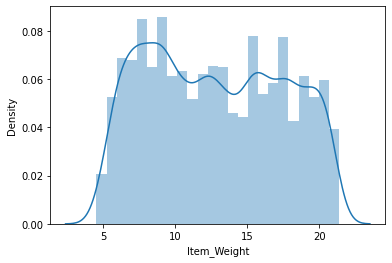

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


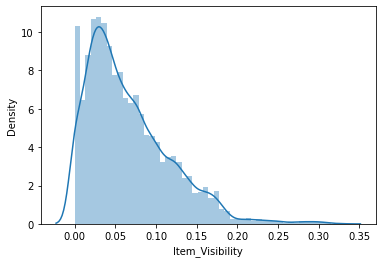

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


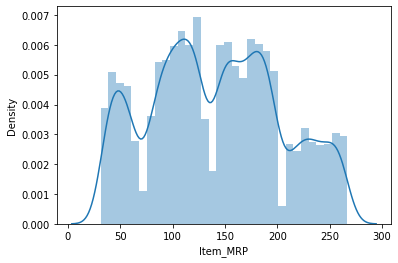

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


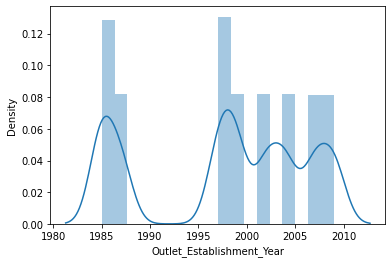

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


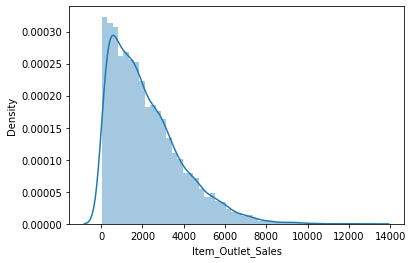

In [ ]:
for i in df.describe().columns:
  sns.distplot(df[i].dropna())
  plt.show()

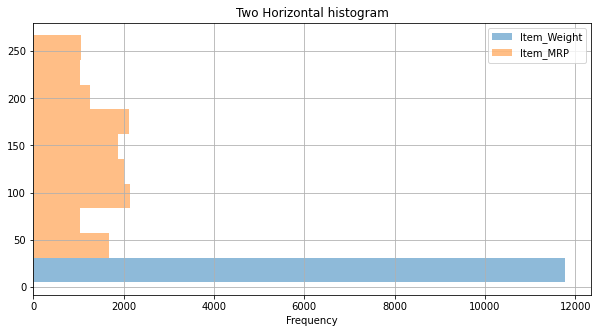

In [ ]:
data = df[['Item_Weight','Item_MRP']]
ax = data.plot.hist(alpha = 0.5, figsize = (10,5), grid = True, orientation = 'horizontal', title = "Two Horizontal histogram")

**Now we let's look at the percentange wise Outlet_Type with location using Pie Chart**

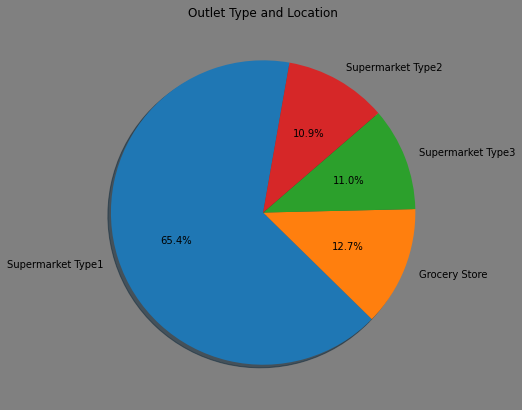

In [ ]:
data_pie = (df['Outlet_Type'].value_counts()[:].rename_axis('Outlet_Location_Type').reset_index(name = 'Outlet_Type'))
plt.figure (figsize = (10,7), facecolor = "Gray")
explode = (0, 0, 0, 0)
plt.pie(data_pie.Outlet_Type, labels=data_pie.Outlet_Location_Type, startangle=80, autopct= '%1.1f%%', shadow =  True, explode = explode)
plt.title ('Outlet Type and Location', color = 'Black')
plt.xticks (rotation = 90)
plt.show()

In [ ]:
df.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

## Bivariate Analysis:

**Target Analysis**

(array([-4000., -2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000.,
        12000., 14000., 16000.]), <a list of 11 Text major ticklabel objects>)

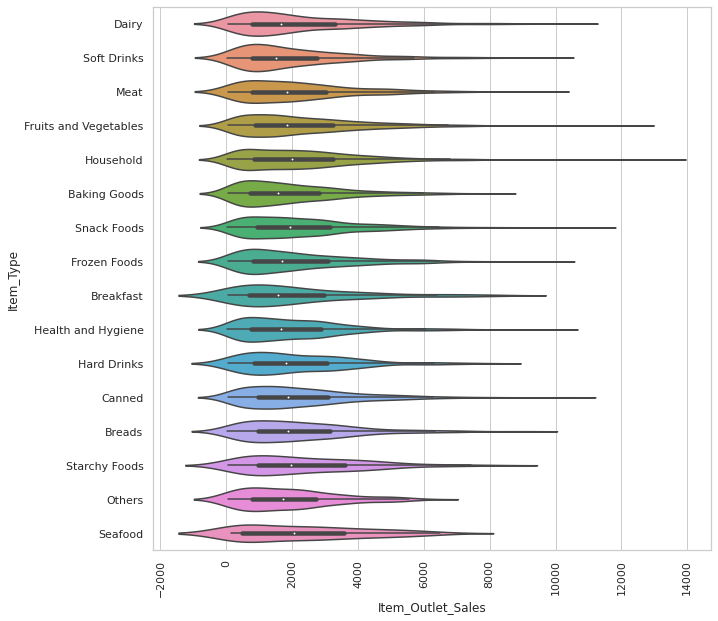

In [ ]:
fig, ax =plt.subplots (figsize = (10,10))
sns.set(style = "whitegrid")
tip = sns.load_dataset("tips")
sns.violinplot (x = 'Item_Outlet_Sales', y = "Item_Type", style = "event", data = df, orient='h')
plt.xticks (rotation = 90)

*Item weight and item outlet sales analysis*

Text(0.5, 1.0, 'Item_Weight and Item_Outlet_Sales Analysis')

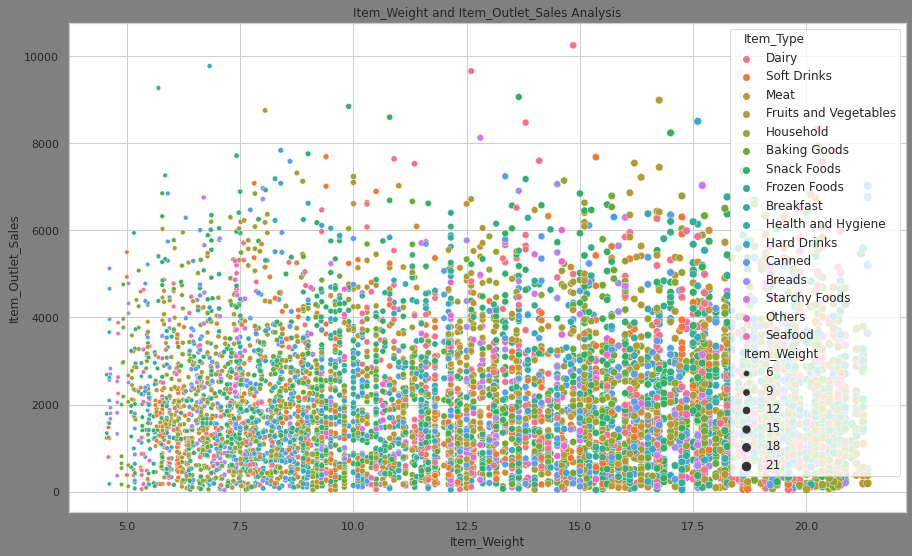

In [ ]:
plt.figure (figsize = (15,9), facecolor = "Gray")
sns.scatterplot (x = "Item_Weight", y = "Item_Outlet_Sales", hue='Item_Type', size='Item_Weight',data = df )
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Weight and Item_Outlet_Sales Analysis')

*Item Visibility and Maximum retail price*

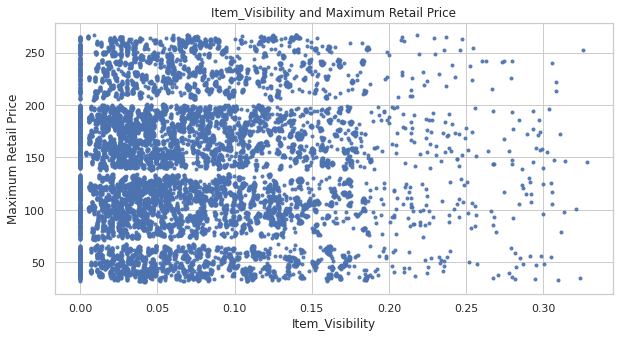

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Item_Visibility')
plt.ylabel('Maximum Retail Price')
plt.title('Item_Visibility and Maximum Retail Price')
plt.plot(df.Item_Visibility, df.Item_MRP, ".",alpha = 0.9)

*Heatmap*

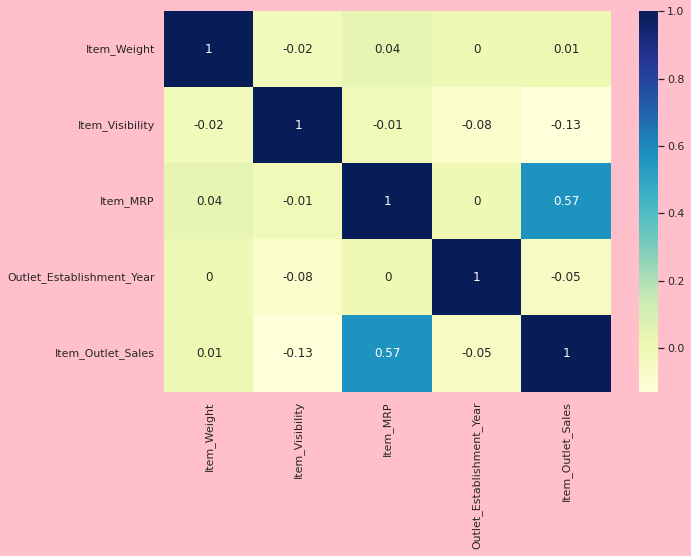

In [ ]:
plt.figure (figsize = (10,7), facecolor = "pink")
sns.heatmap(np.round(df.corr(), 2), annot = True, cmap = 'YlGnBu')

#Missing Value Treatment:

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1952
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  3212
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
dtype: int64

*On the above section we can see Item_Weight and Outlet_Size has null values.
Now we will replace the missing/null with the mean and mode value of that same columns.*

In [ ]:
Weight = df['Item_Weight'].mean() # Here  is the mean value of Item_Weight
Size = df['Outlet_Size'].mode() #Here is mode value of Outlet_Size
print (Weight, Size)

12.69563336875664 0    Medium
dtype: object


**We will replace the missing value replace with missing values with the Mean and Mode of the column.**

In [ ]:
df['Item_Weight'].fillna(value = 12.69563336875664, inplace = True)
df['Outlet_Size'].fillna(value = 'Medium', inplace = True)

In [ ]:
df.info() # Now we can see there is no null value remaining in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11362 entries, 0 to 11361
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            11362 non-null  object 
 1   Item_Weight                11362 non-null  float64
 2   Item_Fat_Content           11362 non-null  object 
 3   Item_Visibility            11362 non-null  float64
 4   Item_Type                  11362 non-null  object 
 5   Item_MRP                   11362 non-null  float64
 6   Outlet_Identifier          11362 non-null  object 
 7   Outlet_Establishment_Year  11362 non-null  int64  
 8   Outlet_Size                11362 non-null  object 
 9   Outlet_Location_Type       11362 non-null  object 
 10  Outlet_Type                11362 non-null  object 
 11  source                     11362 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.0+ MB


In [ ]:
df.isnull().sum() # We can also see there is no missing data using isnull()  

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
source                       0
dtype: int64

In [ ]:
df['Item_MRP'].describe()

count    11362.000000
mean       141.023273
std         61.806370
min         31.990000
25%         94.412000
50%        141.415400
75%        186.026600
max        266.588400
Name: Item_MRP, dtype: float64

In [ ]:
df['Item_Identifier'].value_counts()

DRF48    16
FDZ50    16
FDQ60    16
FDN52    16
FDW10    16
         ..
FDW49     2
FDG38     2
FDD38     2
FDA15     2
FDF04     2
Name: Item_Identifier, Length: 1543, dtype: int64

*Now we will be creating 3 categories as pointed out instead of the already existing 16 categories in Iteam_Identifier.
Changing only first two character *

In [ ]:
df['New_Item_type'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [ ]:
df['New_Item_type'].value_counts()

FD    8152
NC    2174
DR    1036
Name: New_Item_type, dtype: int64

In [ ]:
#Rename them to more intuitive  categories:
df['New_Item_type'] = df['New_Item_type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['New_Item_type'].value_counts()

Food              8152
Non-Consumable    2174
Drinks            1036
Name: New_Item_type, dtype: int64

**If a product is more visible, then it's likely it will be getting higher sales. We can based on that hypothesis and create importance given to a product in a given store according to the mean of significance given to the same product in all other stores.**

In [ ]:
item_visib_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.040901
DRA24,0.040009
DRA59,0.128046
DRB01,0.078302
DRB13,0.005294
...,...
NCZ30,0.032774
NCZ41,0.064351
NCZ42,0.012986


In [ ]:
function = lambda x: x['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index == x['Item_Identifier']][0]
df['item_visib_avg'] = df.apply(function,axis=1).astype(float)
df.head()

<ipython-input-55-ea282eee6820>:1: RuntimeWarning: invalid value encountered in double_scalars
  function = lambda x: x['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index == x['Item_Identifier']][0]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,New_Item_type,item_visib_avg
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,train,Food,1.037214
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,train,Food,1.205928
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,train,Non-Consumable,1.434235
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,train,Food,1.005663
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,train,Food,0.995396


#Feature Engineering:

**We can have a look at the Item_Type variable and classify the categories into perishable and non_perishable as per our understanding and make it into a new feature.**

In [ ]:
# replace all 0's Item_Visibility with mean of Item_Visibility
val = df['Item_Visibility'].mean()
df['Item_Visibility'] = df['Item_Visibility'].replace(to_replace=0.000000, value=val)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,New_Item_type,item_visib_avg
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,train,Food,1.037214
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,train,Food,1.205928
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,train,Non-Consumable,1.434235
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,train,Food,1.005663
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,train,Food,0.995396


*Converting established_date to Age of the outlet*

In [ ]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    11362.000000
mean        15.171097
std          8.371887
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

*Merging item_type categories by mapping into common item type*

In [ ]:
#Get the first two characters of ID:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              8152
Non-Consumable    2174
Drinks            1036
Name: Item_Type_Combined, dtype: int64

# Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

#New variable for outlet
df['Outlet'] = label.fit_transform(df['Outlet_Identifier'])
varib = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet']
for i in varib:
  df[i] = label.fit_transform(df[i])

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,New_Item_type,item_visib_avg,Outlet_Years,Item_Type_Combined,Outlet
0,FDW58,20.750000,1,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,1,train,1,1.037214,14,Food,9
1,FDW14,8.300000,4,0.038428,Dairy,87.3198,OUT017,2007,1,1,1,train,1,1.205928,6,Food,2
2,NCN55,14.600000,1,0.099575,Others,241.7538,OUT010,1998,1,2,0,train,2,1.434235,15,Non-Consumable,0
3,FDQ58,7.315000,1,0.015388,Snack Foods,155.0340,OUT017,2007,1,1,1,train,1,1.005663,6,Food,2
4,FDY38,12.695633,2,0.118599,Dairy,234.2300,OUT027,1985,1,2,3,train,1,0.995396,28,Food,5


#Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(data):
  le = preprocessing.labelEncoder()
  data = le.fit_transform(data)
  return data
 

*Splitting up train and test Data*

In [ ]:
#Divide into test and train:
X = df[df['source']=="train"]
test = df[df['source']=="test"]

#Drop unnecessary columns:
y = X['Item_Outlet_Sales'].values
test.drop(['source','Item_Outlet_Sales'],axis=1,inplace=True)
X.drop(['source','Item_Outlet_Sales'],axis=1,inplace=True)

category_col = ['Item_Weight','Item_Fat_Content','Outlet_Type','Outlet','Outlet_Location_Type']

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.01,shuffle=True,random_state=99)
print("Size of X_train ", X_train.shape)
print("Size of X_cv ", X_cv.shape)
print("Size of y_train ", y_train.shape)
print("Size of y_cv ", y_cv.shape)

Size of X_train  (8437, 11)
Size of X_cv  (86, 11)
Size of y_train  (8437,)
Size of y_cv  (86,)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#Data Pre-Processing

In [ ]:
# checking unique values in the columns of train dataset

df.apply(lambda x: len(x.unique()))

Item_Identifier          1559
Item_Weight               416
Item_Fat_Content            5
Item_Visibility         13006
Item_MRP                 8052
Outlet_Identifier          10
Outlet_Size                 4
Outlet_Location_Type        3
Outlet_Type                 4
Item_Outlet_Sales        3494
source                      2
dtype: int64

#One Hot Encoding

In [ ]:
df = pd.get_dummies(df)

print(df.shape)

(14204, 1590)


#Model Building

In [ ]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1, inplace=True)

In [ ]:
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

In [54]:
train.drop(['source'],axis=1,inplace=True)
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

KeyError: ignored

In [ ]:
X_train = train_data.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train = train_data['Item_Outlet_Sales']
X_test = test_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

#Linear Regression

In [74]:

# splitting the data into dependent and independent variables

x = df.drop('Item_Outlet_Sales', axis = 1)
y = df.Item_Outlet_Sales

print(x.shape)
print(y.shape)

(14204, 12)
(14204,)


In [ ]:
# splitting the dataset into train and test

train = df.iloc[:8523,:]
test = df.iloc[8523:,:]

print(train.shape)
print(test.shape)

(8523, 1590)
(5681, 1590)


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(y_train)

# predicting the  test set results
y_pred = model.predict(X_cv)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_cv, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_cv, y_pred))

TypeError: ignored

In [76]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)

ValueError: ignored

In [67]:
plt.scatter(y_train,predictions)

NameError: ignored

# XGBoost

In [58]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators = 100, learning_rate=0.05)
model.fit(X_train, y_train)

ValueError: ignored

In [59]:
y_pred = model.predict(X_test)
y_pred

ValueError: ignored